In [1]:
# Import necessary python libraries and constants
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi

In [2]:
# Define a Python function psi_1s according to the given equation.
def psi_1s(x, y, z, Z=1, a0=1):
    r = np.sqrt(x**2 + y**2 + z**2) # Compute r
    psi_1s = (1 / np.sqrt(pi * a0**3)) * np.exp(-r / a0)
    return psi_1s

In [3]:
# Define the Laplacian of the 1s orbital.
def laplacian_psi_1s(x, y, z, Z=1, a0=1):
    r = np.sqrt(x**2 + y**2 + z**2)
    
    psi = psi_1s(x, y, z, Z, a0) # Compute the 1s orbital by the defined function. 
    d_psi_dr = - psi / a0 # Calculate the first derivative of psi: psi = 1/sqrt(pi*a0^3)*e^(-r/a0), d_psi_dr = 1/sqrt(pi*a0^3)*e^(-r/a0)*(-1/a0) = -psi/a0
    d2_psi_dr2 = psi / (a0**2) # Calculate the second derivative of psi: d_psi_dr = 1/sqrt(pi*a0^3)*e^(-r/a0)*(-1/a0), d2_psi_dr2 =1/sqrt(pi*a0^3)*e^(-r/a0)*(-1/a0)^2 = psi/(a0^2) 
    laplacian = d2_psi_dr2 + (2 / r) * d_psi_dr # Compute Laplacian
    return laplacian

# Calculate the result of Laplacian by setting x = 2, y = 4, z = 4
x = 2
y = 4
z = 4
r = np.sqrt(x**2 + y**2 + z**2) 

laplacian_value = laplacian_psi_1s(x, y, z, Z=1, a0=1)

print(f'When x = {x}, y = {y}, z = {z} (r = {r}), the value of analytically computed laplacian is {laplacian_value}')

When x = 2, y = 4, z = 4 (r = 6.0), the value of analytically computed laplacian is 0.0009323241055143249


In [4]:
# Verify the result of Laplacian by using SymPy.
import sympy as sp
from sympy import lambdify

# Set r and a0 as a symbol
r = sp.symbols('r')
a0 = sp.symbols('a0')

# Define the 1s orbital by SymPy
psi_1s_sp = (1 / sp.sqrt(sp.pi * a0**3)) * sp.exp(-r / a0)

# Computed the derivatives by SymPy
d_psi_dr_sp = sp.diff(psi_1s_sp, r)
d2_psi_dr2_sp = sp.diff(d_psi_dr_sp, r)
laplacian_psi_1s_sp = d2_psi_dr2_sp + (2 / r) * d_psi_dr_sp

# Lambdify Laplacian to get the numerical result
laplacian_psi_1s_sp_func = lambdify((r, a0), laplacian_psi_1s_sp, 'numpy')

# Verify the result of Laplacian by setting r = 6 (x = 2, y = 4, z = 4), a0 =1
laplacian_value_sp = laplacian_psi_1s_sp_func(6, 1)
print(f'When r = 6, the value of laplacian computed by SymPy is {laplacian_value_sp}, the difference between two methods is {laplacian_value_sp - laplacian_value}')


When r = 6, the value of laplacian computed by SymPy is 0.0009323241055143249, the difference between two methods is 0.0


In [5]:
# Define a function to compute the diagonal kinetic energy matrix element using random sampling.
def compute_diagonal_kinetic_energy_random_sampling(N, L):
    np.random.seed(42) # Set a random seed for reproducibility
    # Randonly generate x, y and z in the range of [-L, L] with the number of points = N
    x = np.random.uniform(-L, L, N)
    y = np.random.uniform(-L, L, N)
    z = np.random.uniform(-L, L, N)
    laplacian_value = laplacian_psi_1s(x, y, z) # Calculate the value of Laplacian
    psi_value = psi_1s(x, y, z) # Calculate the 1s orbital
    integrand = -0.5 * psi_value * laplacian_value # Compute the integrand.
    V = (2 * L)**3
    K_ii = V * np.mean(integrand) # Compute the diagonal kinetic energy matrix element
    return K_ii

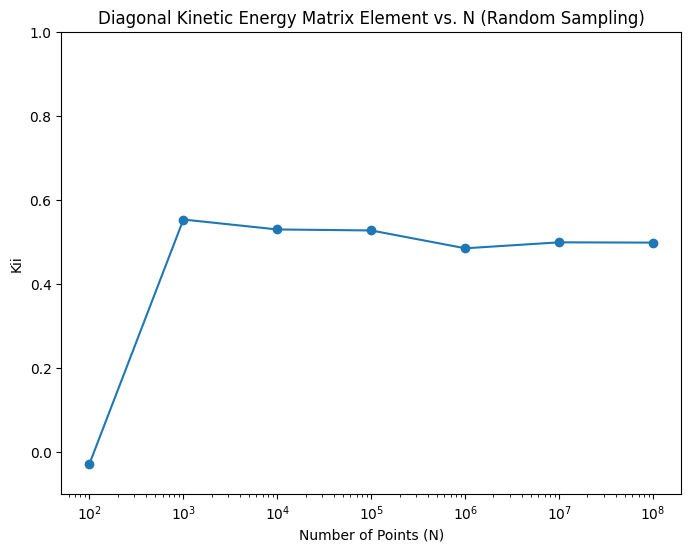

In [6]:
L = 7 # Set the value of L = 7
number_of_points = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8] # Set the number of points.
Kii_values = [compute_diagonal_kinetic_energy_random_sampling(N, L) for N in number_of_points] # Calculate Kii of differnet number of points.
    
# Plot the result: Kii vs N
plt.figure(figsize=(8, 6))
plt.plot(number_of_points, Kii_values, marker = 'o')
plt.xscale('log') # Logarithmic scale
plt.ylim(-0.1, 1) # Set unified range of y-axis for comparison
plt.xlabel('Number of Points (N)')
plt.ylabel('Kii')
plt.title('Diagonal Kinetic Energy Matrix Element vs. N (Random Sampling)')
plt.savefig('Diagonal Kinetic Energy Matrix Element vs. N (Random Sampling).png')
plt.show()

In [7]:
# Discuss the convergence of the result
print('Discussion: The result converges when number of points reaches 10^7')

Discussion: The result converges when number of points reaches 10^7


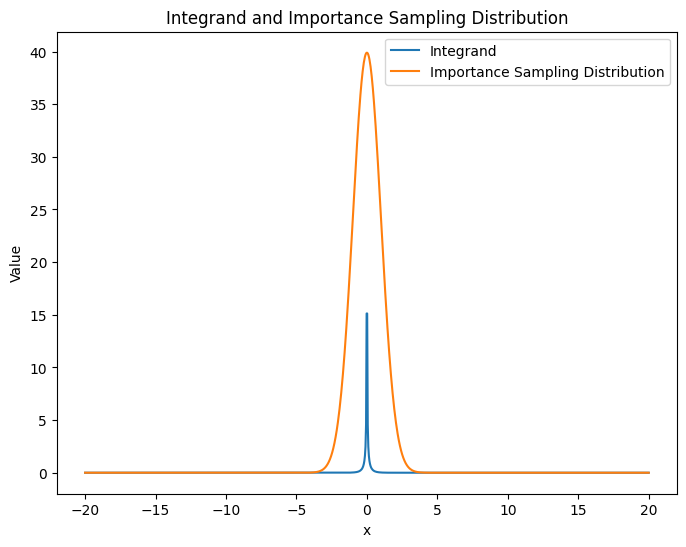

In [8]:
# Use Gaussian distribution for importance sampling
from scipy.stats import norm

# Compute the integrand and importance sampling
x = np.linspace(-20, 20, 1000)
y = 0
z = 0
laplacian_value = laplacian_psi_1s(x, y, z)
psi_value = psi_1s(x, y, z)
integrand = -0.5 * psi_value * laplacian_value
importance_sampling = norm.pdf(x, loc = 0, scale = 1) # Set Gaussian distribution's mean = 0, standard deviation = 1

# Plot the integrand and importance sampling to see whether Gaussian distribution is a suitable importance sampling method in this case.
plt.figure(figsize=(8, 6))
plt.plot(x, integrand, label='Integrand')
plt.plot(x, 100 * importance_sampling, label='Importance Sampling Distribution') # "100 * importance_sampling" for better visualization
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Integrand and Importance Sampling Distribution')
plt.legend()
plt.show()

In [9]:
# Define a function to compute the diagonal kinetic energy matrix element using importance sampling.
def compute_diagonal_kinetic_energy_importance_sampling(N, L):
    np.random.seed(42) # Set a random seed for reproducibility
    # Generate x, y and z by Gaussian distribution
    x = norm.rvs(loc = 0, scale = 1, size = N)
    y = norm.rvs(loc = 0, scale = 1, size = N)
    z = norm.rvs(loc = 0, scale = 1, size = N)
    
    # Compute the 1s orbital and its Laplacian
    laplacian_value = laplacian_psi_1s(x, y, z)
    psi_value = psi_1s(x, y, z)
    
    integrand = -0.5 * psi_value * laplacian_value # Compute the integrand
    g_values = norm.pdf(x, loc = 0, scale = 1) * norm.pdf(y, loc = 0, scale = 1) * norm.pdf(z, loc = 0, scale = 1)  # g(x,y,z )
    Kii_importance_sampling = np.mean(integrand / g_values) # Compute Kii according to the equation
    return Kii_importance_sampling


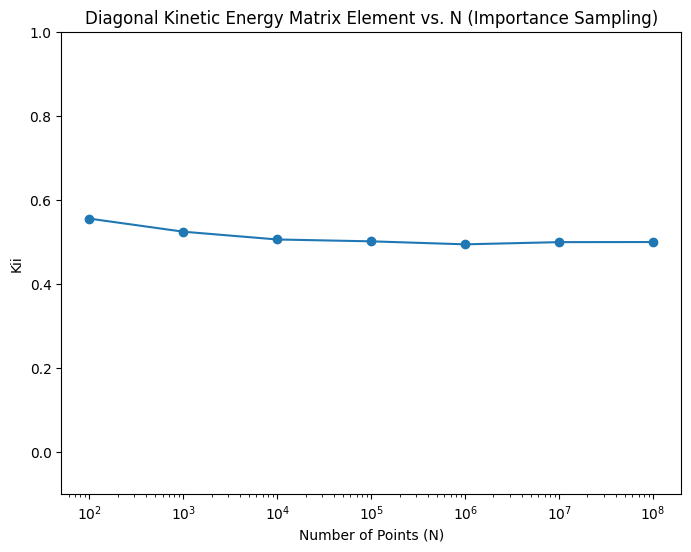

In [10]:
# Copmute Kii of differnet numbers of points
L = 7
number_of_points = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
Kii_values_importance_sampling = [compute_diagonal_kinetic_energy_importance_sampling(N, L) for N in number_of_points]
    
# Plot the results of Kii vs N by using importance
plt.figure(figsize=(8, 6))
plt.plot(number_of_points, Kii_values_importance_sampling, marker = 'o')
plt.xscale('log') # Logarithmic scale
plt.ylim(-0.1, 1) # Set unified range of y-axis for comparison
plt.xlabel('Number of Points (N)')
plt.ylabel('Kii')
plt.title('Diagonal Kinetic Energy Matrix Element vs. N (Importance Sampling)')
plt.savefig('Diagonal Kinetic Energy Matrix Element vs. N (Importance Sampling).png')
plt.show()

In [11]:
# Discuss the convergence of result.
print('Discussion:Importance sampling is more efficient than random sampling. The result converges when number of points reaches 10^6.')

Discussion:Importance sampling is more efficient than random sampling. The result converges when number of points reaches 10^6.


In [12]:
# Define a function to compute off-diagonal kinetic energy matrix element by random sampling
def compute_off_diagonal_kinetic_energy_random_sampling(N, L, Rz):
    # Generate x, y, z by random sampling
    np.random.seed(42)
    x = np.random.uniform(-L, L, N)
    y = np.random.uniform(-L, L, N)
    z = np.random.uniform(-L, L, N)

    # Calculate the value of laplacian and psi according the given equation
    laplacian_value = laplacian_psi_1s(x, y, z - Rz / 2)
    psi_value = psi_1s(x, y, z + Rz / 2)
    
    integrand = -0.5 * psi_value * laplacian_value # Compute the integrand
    V = (2 * L)**3
    Kij = V * np.mean(integrand) # Compute Kij
    return Kij

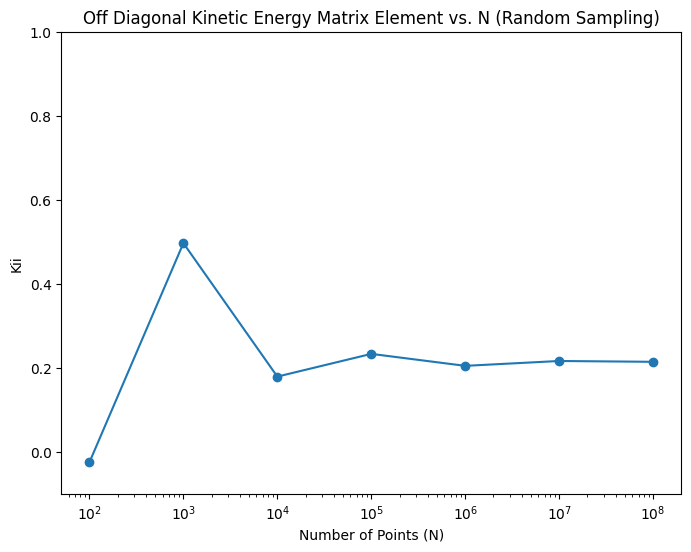

In [13]:
# Set the value of L, Rz and number of points
L = 7
Rz = 1.4
number_of_points = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# Comute the off-diagonal kinetic energy matrix element (Kij) of different number of points
Kij_values = [compute_off_diagonal_kinetic_energy_random_sampling(N, L, Rz) for N in number_of_points]
    
# Plot Kij vs N  
plt.figure(figsize=(8, 6))
plt.plot(number_of_points, Kij_values, marker = 'o')
plt.xscale('log') # Logarithmic scale
plt.ylim(-0.1, 1) # Set unified range of y-axis for comparison
plt.xlabel('Number of Points (N)')
plt.ylabel('Kii')
plt.title('Off Diagonal Kinetic Energy Matrix Element vs. N (Random Sampling)')
plt.savefig('Off Diagonal Kinetic Energy Matrix Element vs. N (Random Sampling).png')
plt.show()

In [14]:
# Discuss the convergence of the result.
print('Discussion: The result of Off-Diagonal Kinetic Energy Matrix Element converges when number of points reaches 10^7')

Discussion: The result of Off-Diagonal Kinetic Energy Matrix Element converges when number of points reaches 10^7


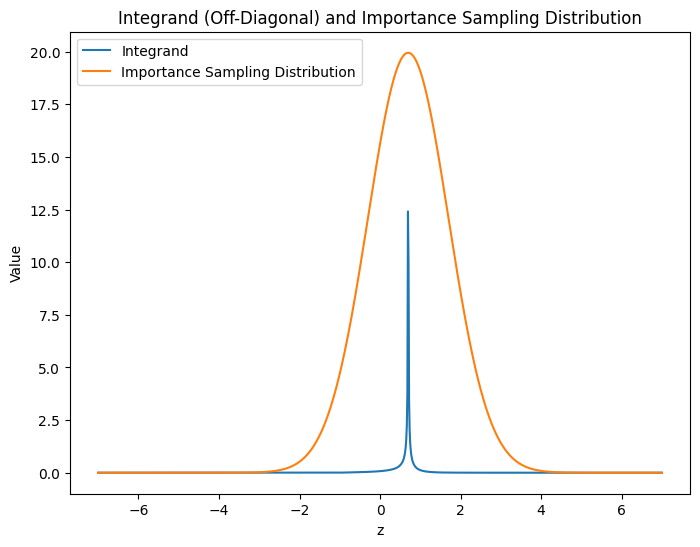

In [15]:
# Compute the integrand and importance sampling
x = 0
y = 0
z = np.linspace(-7, 7, 1000)
Rz = 1.4
laplacian_value_off_diagonal = laplacian_psi_1s(x, y, (z - Rz / 2))
psi_value_off_diagonal = psi_1s(x, y, (z + Rz / 2))
integrand_off_diagonal = -0.5 * psi_value_off_diagonal * laplacian_value_off_diagonal

# Set Gaussian distribution's mean = 0.7, standard deviation = 1 (the integrand is symmetric about 0.7 at z-axis)
importance_sampling = norm.pdf(z, loc = 0.7, scale = 1) 

# Plot the integrand and importance sampling
plt.figure(figsize=(8, 6))
plt.plot(z, integrand_off_diagonal, label='Integrand')
plt.plot(z, 50 * importance_sampling, label='Importance Sampling Distribution')
plt.xlabel('z')
plt.ylabel('Value')
plt.title('Integrand (Off-Diagonal) and Importance Sampling Distribution')
plt.legend()
plt.show()

In [16]:
# Define a function to compute off-diagonal kinetic energy matrix element by importance sampling.
def compute_off_diagonal_kinetic_energy_importance_sampling(N, L, Rz):
    np.random.seed(42)
    # Generate x, y, z by Gaussian distribution
    x = norm.rvs(loc = 0, scale = 1, size = N) # When y = 0 , z = 0, the integrand is symmetric about 0, so set the Gaussian distribution's mean = 0
    y = norm.rvs(loc = 0, scale = 1, size = N) # When x = 0 , z = 0, the integrand is symmetric about 0, so set the Gaussian distribution's mean = 0
    z = norm.rvs(loc = 0.7, scale = 1, size = N) # When x = 0 , y = 0, the integrand is symmetric about 0.7, so set the Gaussian distribution's mean = 0.7
    
    # Compute the value of laplacian and psi
    laplacian_value_off_diagonal = laplacian_psi_1s(x, y, z - (Rz / 2))
    psi_value_off_diagonal = psi_1s(x, y, z + (Rz / 2) )
   
    # Compute the integrand
    integrand_off_diagonal = -0.5 * psi_value_off_diagonal * laplacian_value_off_diagonal
   
    # Compute Kij
    g_values_off_diagonal = norm.pdf(x, loc = 0, scale = 1) * norm.pdf(y, loc = 0, scale = 1) * norm.pdf(z, loc = 0.7, scale = 1)  # g(x,y,z )
    Kij_off_diagonal_importance_sampling = np.mean(integrand_off_diagonal / g_values_off_diagonal)
    
    return Kij_off_diagonal_importance_sampling

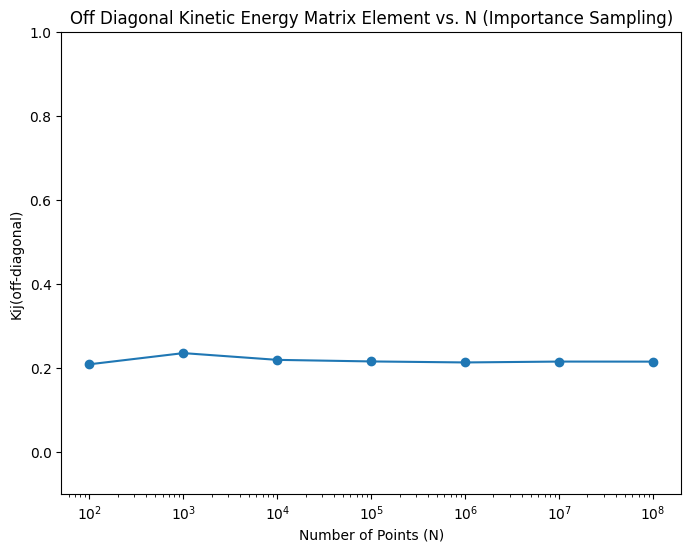

In [17]:
# Compute Kij of different numbers of points with L = 7, Rz = 1.4
L = 7
Rz = 1.4
number_of_points = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
Kij_off_diagonal_values = [compute_off_diagonal_kinetic_energy_importance_sampling(N, L, Rz) for N in number_of_points]
    
# Plot Kij vs N
plt.figure(figsize=(8, 6))
plt.plot(number_of_points, Kij_off_diagonal_values, marker = 'o')
plt.xscale('log') # Logarithmic scale
plt.ylim(-0.1, 1) # Set unified range of y-axis for comparison
plt.xlabel('Number of Points (N)')
plt.ylabel('Kij(off-diagonal)')
plt.title('Off Diagonal Kinetic Energy Matrix Element vs. N (Importance Sampling)')
plt.savefig('Off Diagonal Kinetic Energy Matrix Element vs. N (Importance Sampling).png')
plt.show()

In [18]:
# Discuss the convergence of the results
print('Discussion:The result of Off Diagonal Kinetic Energy Matrix Element converges when number of points reaches 10^4.')

Discussion:The result of Off Diagonal Kinetic Energy Matrix Element converges when number of points reaches 10^4.
